In [1]:

import pandas as pd
import numpy as np
from scipy import stats

# Explore Data

In [3]:
df=pd.read_csv("Unemployment in India.csv")

In [4]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [6]:
df.tail(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# Handle Missing Values

In [9]:
missing_values=df.isnull().sum()


In [10]:
missing_values

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [11]:
print(f'Rows = {df.shape[0]}')
print(f'Columns = {df.shape[1]}')

Rows = 768
Columns = 7


In [12]:
# remove whitespaces
df.columns = df.columns.str.strip()

print('Successfully removed extra spaces from column names')

Successfully removed extra spaces from column names


In [13]:
# Columns name
print('Columns Names\n')
for i in df.columns:
    print(i)

Columns Names

Region
Date
Frequency
Estimated Unemployment Rate (%)
Estimated Employed
Estimated Labour Participation Rate (%)
Area


In [14]:
# Rename columns
df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

# Display the new column names
print('Renamed Columns:\n')
print(df.columns)

Renamed Columns:

Index(['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labour_Participation_Rate', 'Area'],
      dtype='object')


In [15]:
print('Columns Names\n')
for i in df.columns:
    print(i)

Columns Names

Region
Date
Frequency
Unemployment_Rate
Employed
Labour_Participation_Rate
Area


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Region                     740 non-null    object 
 1   Date                       740 non-null    object 
 2   Frequency                  740 non-null    object 
 3   Unemployment_Rate          740 non-null    float64
 4   Employed                   740 non-null    float64
 5   Labour_Participation_Rate  740 non-null    float64
 6   Area                       740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [17]:
# Set display format for floating-point numbers
pd.options.display.float_format = '{:.0f}'.format

# Statistical summary of data
df.describe()

,Unemployment_Rate,Employed,Labour_Participation_Rate
count,740,740,740
mean,12,7204460,43
std,11,8087988,8
min,0,49420,13
25%,5,1190404,38
50%,8,4744178,41
75%,16,11275490,46
max,77,45777509,73


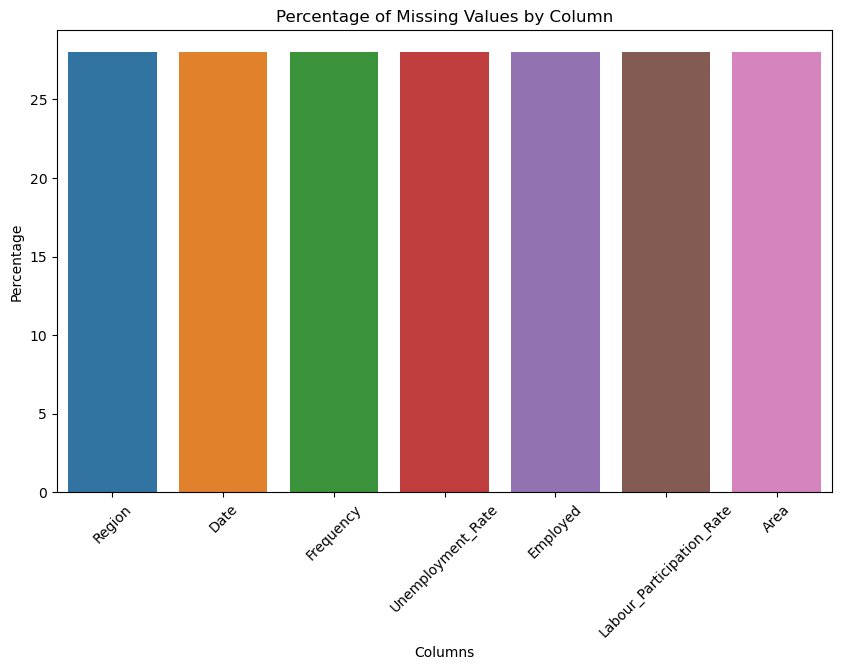

In [18]:
# Plot the missing percentage
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=df.columns, y=missing_values)
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Fill missing values for numerical columns with the mean
df['Unemployment_Rate'].fillna(df['Unemployment_Rate'].mean(), inplace=True)
df['Employed'].fillna(df['Employed'].median(), inplace=True)
df['Labour_Participation_Rate'].fillna(df['Labour_Participation_Rate'].mean(), inplace=True)

# Fill missing values for categorical columns with the mode
df['Region'].fillna(df['Region'].mode()[0], inplace=True)
df['Date'].fillna(df['Date'].mode()[0], inplace=True)
df['Frequency'].fillna(df['Frequency'].mode()[0], inplace=True)
df['Area'].fillna(df['Area'].mode()[0], inplace=True)

print('Missing values filled successfully\n')
print('Missing Data Is Less Then 5% Therefor i Imputed Missing Values')

Missing values filled successfully

Missing Data Is Less Then 5% Therefor i Imputed Missing Values


In [20]:
# check missing values after imputation
df.isna().sum()

Region                       0
Date                         0
Frequency                    0
Unemployment_Rate            0
Employed                     0
Labour_Participation_Rate    0
Area                         0
dtype: int64

# Duplicate Rows

In [22]:
# Display duplicate rows
print(f'Rows before dropping duplicate rows : {df.shape[0]}')
print(f'Duplicate Rows: {df.duplicated().sum()}')

Rows before dropping duplicate rows : 768
Duplicate Rows: 27


In [23]:
# display duplicate rows
duplicate_rows = df[df.duplicated()].head(10)
duplicate_rows

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area
360,Andhra Pradesh,30-11-2019,Monthly,12,4744178,43,Urban
361,Andhra Pradesh,30-11-2019,Monthly,12,4744178,43,Urban
362,Andhra Pradesh,30-11-2019,Monthly,12,4744178,43,Urban
363,Andhra Pradesh,30-11-2019,Monthly,12,4744178,43,Urban
364,Andhra Pradesh,30-11-2019,Monthly,12,4744178,43,Urban
365,Andhra Pradesh,30-11-2019,Monthly,12,4744178,43,Urban
366,Andhra Pradesh,30-11-2019,Monthly,12,4744178,43,Urban
367,Andhra Pradesh,30-11-2019,Monthly,12,4744178,43,Urban
368,Andhra Pradesh,30-11-2019,Monthly,12,4744178,43,Urban
369,Andhra Pradesh,30-11-2019,Monthly,12,4744178,43,Urban


In [24]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

print('Duplicate rows dropped successfully\n')
print(f'Rows after dropping duplicates: {df.shape[0]}')

Duplicate rows dropped successfully

Rows after dropping duplicates: 741


#  Outliers

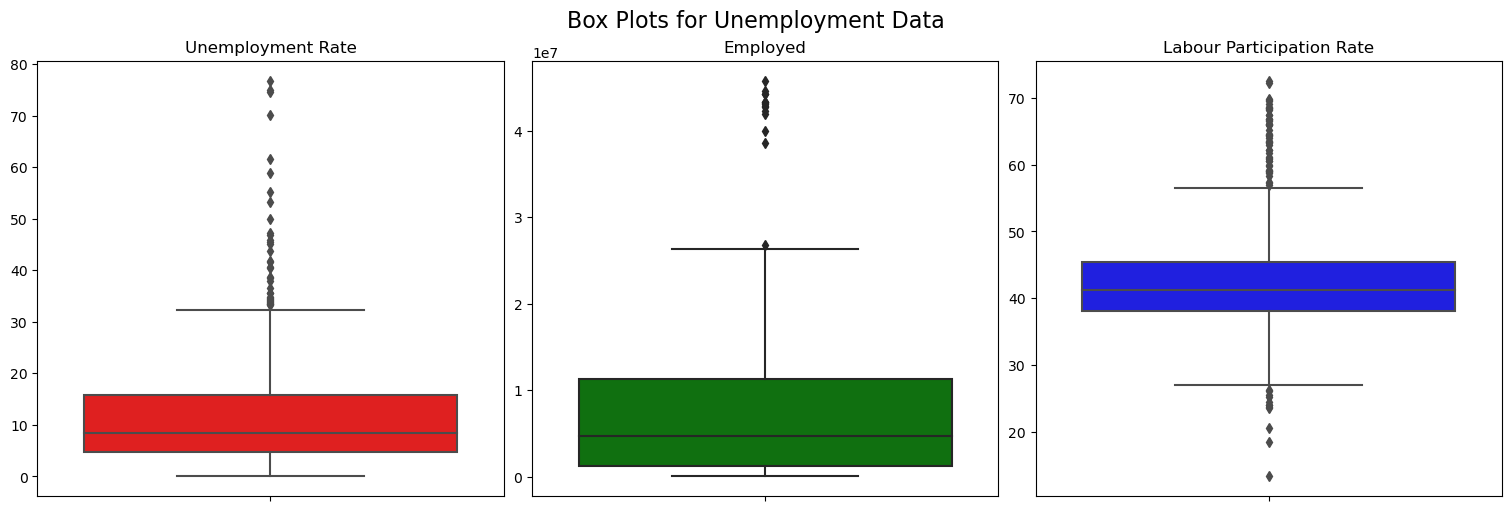

In [26]:
# Set up the figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

# Create individual box plots
sns.boxplot(ax=axes[0], y=df["Unemployment_Rate"], color="red")
axes[0].set_title("Unemployment Rate")
axes[0].set_ylabel("")

sns.boxplot(ax=axes[1], y=df["Employed"], color="green")
axes[1].set_title("Employed")
axes[1].set_ylabel("")

sns.boxplot(ax=axes[2], y=df["Labour_Participation_Rate"], color="blue")
axes[2].set_title("Labour Participation Rate")
axes[2].set_ylabel("")

# Set a common title for the figure
fig.suptitle("Box Plots for Unemployment Data", fontsize=16)
plt.show()

# Check Outliers in Individual Column

In [28]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Function to find outliers using Z-score
def find_outliers_zscore(data, column):
    z_scores = stats.zscore(data[column])
    abs_z_scores = np.abs(z_scores)
    outliers = data[abs_z_scores > 3]
    return outliers
    # Find outliers using IQR method
iqr_outliers = find_outliers_iqr(df, 'Employed')
print(f'IQR Method: Found {iqr_outliers.shape[0]} outliers in column Employed\n')

# Find outliers using Z-score method
zscore_outliers = find_outliers_zscore(df, 'Employed')
print(f'Z-score Method: Found {zscore_outliers.shape[0]} outliers in column Employed')

IQR Method: Found 15 outliers in column Employed

Z-score Method: Found 14 outliers in column Employed


In [29]:
# outliers using z-score method
z = np.abs(stats.zscore(df[['Labour_Participation_Rate', 'Employed', 'Unemployment_Rate']]))
outliers = (z > 3).sum()
print(f'There are total {outliers.sum()} outliers in Labour_Participation_Rate, Employed and Unemployment_Rate columns using Z-score method \n')


# outliers using iqr method 
Q1 = df[['Labour_Participation_Rate', 'Employed', 'Unemployment_Rate']].quantile(0.25)
Q3 = df[['Labour_Participation_Rate', 'Employed', 'Unemployment_Rate']].quantile(0.75)
IQR = Q3 - Q1
outliers = (df[['Labour_Participation_Rate', 'Employed', 'Unemployment_Rate']] < (Q1 - 1.5 * IQR)) | (df[['Labour_Participation_Rate', 'Employed', 'Unemployment_Rate']] > (Q3 + 1.5 * IQR))
print(f'There are total {outliers.sum().sum()} outliers in Labour_Participation_Rate, Employed and Unemployment_Rate columns using IQR method')

There are total 42 outliers in Labour_Participation_Rate, Employed and Unemployment_Rate columns using Z-score method 

There are total 113 outliers in Labour_Participation_Rate, Employed and Unemployment_Rate columns using IQR method


# Type Conversion

In [31]:
# Before Conversion
df.dtypes

Region                        object
Date                          object
Frequency                     object
Unemployment_Rate            float64
Employed                     float64
Labour_Participation_Rate    float64
Area                          object
dtype: object

In [32]:
import warnings
warnings.simplefilter('ignore')

In [33]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert object columns to categorical format
df['Region'] = df['Region'].astype('category')
df['Frequency'] = df['Frequency'].astype('category')
df['Area'] = df['Area'].astype('category')

# Check datatypes
df.dtypes

Region                             category
Date                         datetime64[ns]
Frequency                          category
Unemployment_Rate                   float64
Employed                            float64
Labour_Participation_Rate           float64
Area                               category
dtype: object

#  Feature Engineering

In [35]:
# Extract Year and Month from Date
df['Year'] = df['Date'].dt.year  # Extract year
df['Month'] = df['Date'].dt.month_name()  # Extract month

# Unemployment Category (Low, Medium, High)
bins = [0, 5, 15, 25, 77] # Define bins
labels = ['Low', 'Medium', 'High', 'Very High'] # Define labels
df['Unemployment_Category'] = pd.cut(df['Unemployment_Rate'], bins=bins, labels=labels, right=False) # create a new column

# Employment Growth Rate (Month-over-Month)
# Sort by Region, Area, and Date to ensure correct calculation
df = df.sort_values(by=['Region', 'Area', 'Date'])
# Calculate the percentage change in 'Employed' column
df['Employment_Growth_Rate'] = df.groupby(['Region', 'Area'])['Employed'].pct_change() * 100
# Fill NaN values with 0 if occured
df['Employment_Growth_Rate'] = df['Employment_Growth_Rate'].fillna(0)

# Flag data from April 2020 onwards as COVID-19 period
df['COVID_19_Flag'] = df['Date'].apply(lambda x: 'Yes' if x >= pd.to_datetime('2020-04-01') else 'No')

# Unemployment-to-Employment Ratio
df['Unemployment_to_Employment_Ratio'] = df['Unemployment_Rate'] / (100 - df['Unemployment_Rate'])

# Seasonality Flag (Quarter)
def get_season(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'
        df['Quarter_Season'] = df['Month'].apply(get_season)

print("7 New features added successfully")
        

7 New features added successfully


In [36]:
df.head()

,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area,Year,Month,Unemployment_Category,Employment_Growth_Rate,COVID_19_Flag,Unemployment_to_Employment_Ratio
0,Andhra Pradesh,2019-05-31,Monthly,4,11999139,43,Rural,2019,May,Low,0,No,0
1,Andhra Pradesh,2019-06-30,Monthly,3,11755881,42,Rural,2019,June,Low,-2,No,0
2,Andhra Pradesh,2019-07-31,Monthly,4,12086707,44,Rural,2019,July,Low,3,No,0
3,Andhra Pradesh,2019-08-31,Monthly,3,12285693,44,Rural,2019,August,Low,2,No,0
4,Andhra Pradesh,2019-09-30,Monthly,5,12256762,45,Rural,2019,September,Medium,-0,No,0


# Taking Insights

# How Covid-19 affects the employment

In [39]:
# Average unemployment rate before and after COVID-19
pre_covid = df[df['COVID_19_Flag'] == 'No']['Unemployment_Rate'].mean()
post_covid = df[df['COVID_19_Flag'] == 'Yes']['Unemployment_Rate'].mean()
print(f"Average Unemployment Rate (Pre-COVID): {pre_covid:.2f}%")
print(f"Average Unemployment Rate (Post-COVID): {post_covid:.2f}%")

Average Unemployment Rate (Pre-COVID): 9.62%
Average Unemployment Rate (Post-COVID): 20.19%


# visualization 

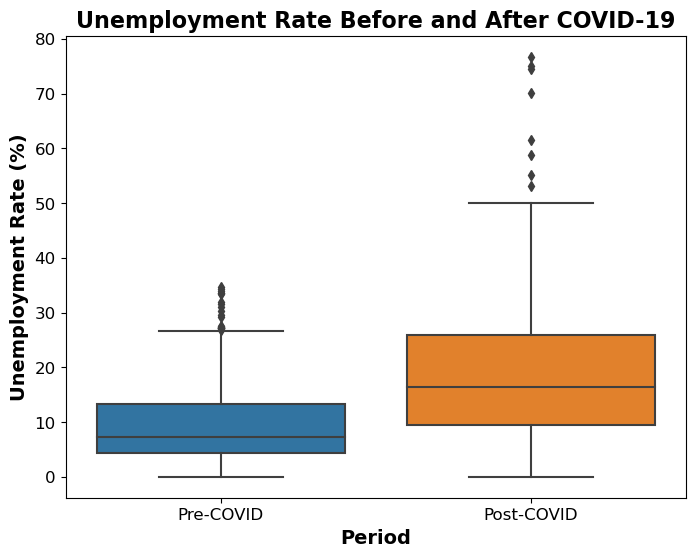

In [41]:
# Plot unemployment rate before and after COVID-19
plt.figure(figsize=(8, 6))
sns.boxplot(x='COVID_19_Flag', y='Unemployment_Rate', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Unemployment Rate Before and After COVID-19', fontsize=16, fontweight='bold')
plt.xlabel('Period', fontsize=14, fontweight='bold')
plt.ylabel('Unemployment Rate (%)', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Pre-COVID', 'Post-COVID'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Count of Unemployment Category

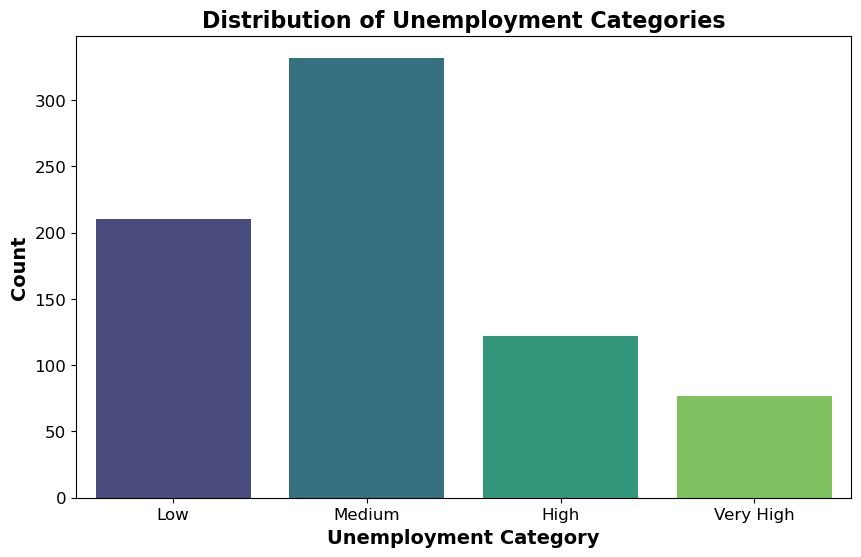

In [43]:
# Plot unemployment category distribution
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Unemployment_Category', 
    data=df, 
    order=['Low', 'Medium', 'High', 'Very High'], 
    palette='viridis'
)
plt.title('Distribution of Unemployment Categories', fontsize=16, fontweight='bold')
plt.xlabel('Unemployment Category', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Top 10 Regions With Highest Employment Growth Rate and Unemployment Rate

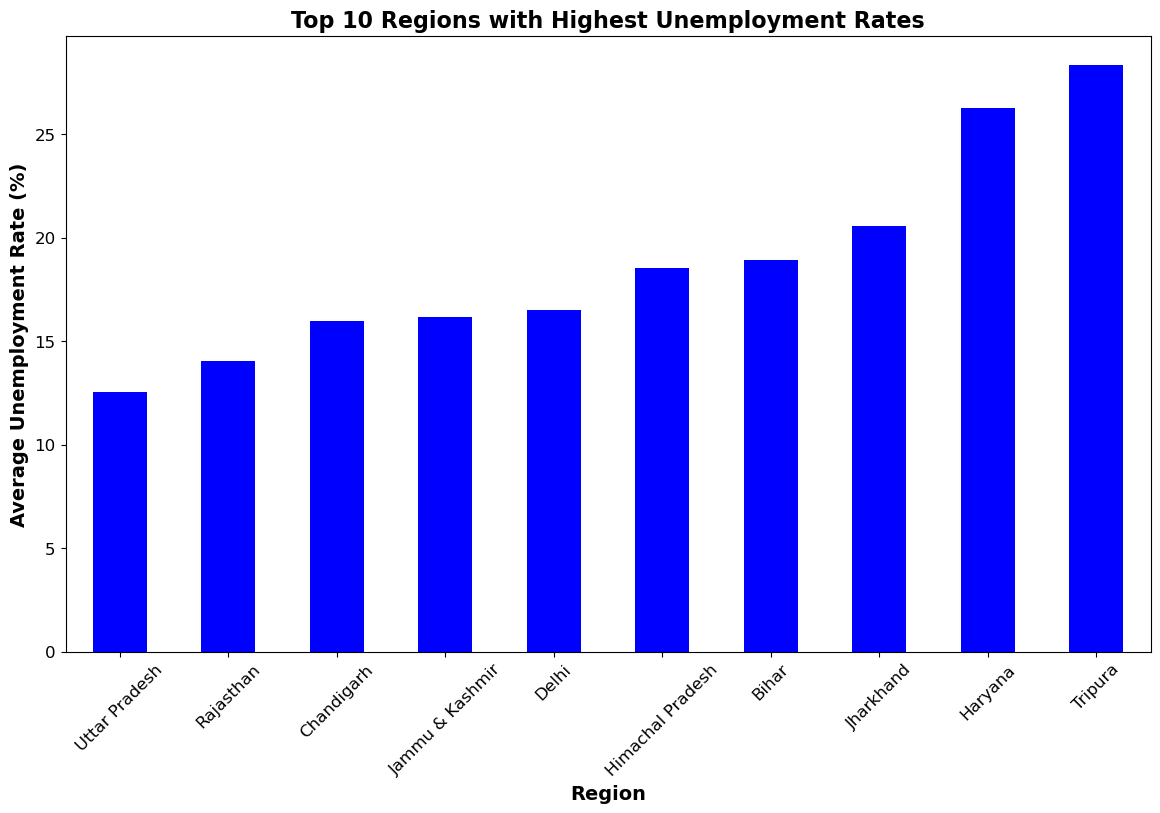

In [45]:
# Average unemployment rate by region
avg_unemployment = df.groupby('Region')['Unemployment_Rate'].mean().sort_values()

# make plot
plt.figure(figsize=(14, 8))
avg_unemployment.tail(10).plot(kind='bar', color='blue')
plt.title('Top 10 Regions with Highest Unemployment Rates', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('Average Unemployment Rate (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

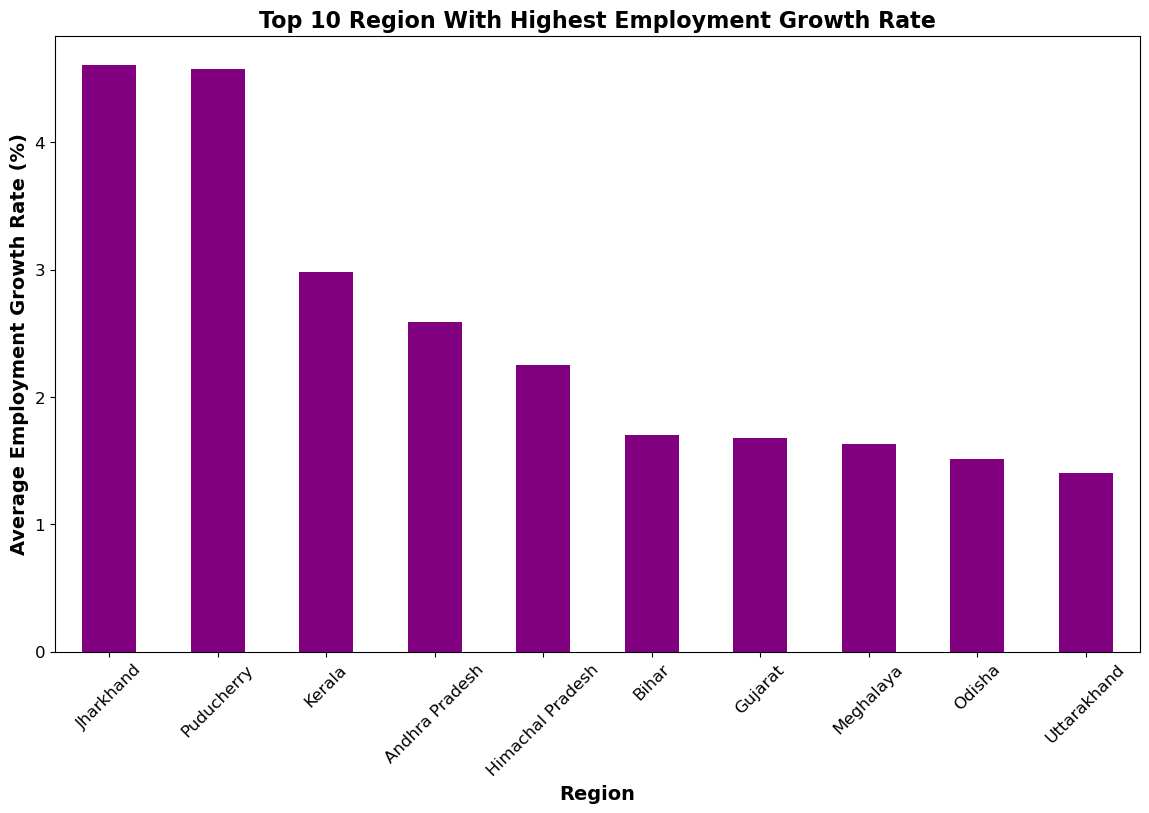

In [46]:
# Average labor participation rate by region
avg_employment_rate = df.groupby('Region')['Employment_Growth_Rate'].mean().sort_values(ascending=False).head(10)

# Make plot
plt.figure(figsize=(14, 8))
avg_employment_rate.plot(kind='bar', color='purple')
plt.title('Top 10 Region With Highest Employment Growth Rate', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=14, fontweight='bold')
plt.ylabel('Average Employment Growth Rate (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Unemployment in Rural and Urban Areas During Covid19

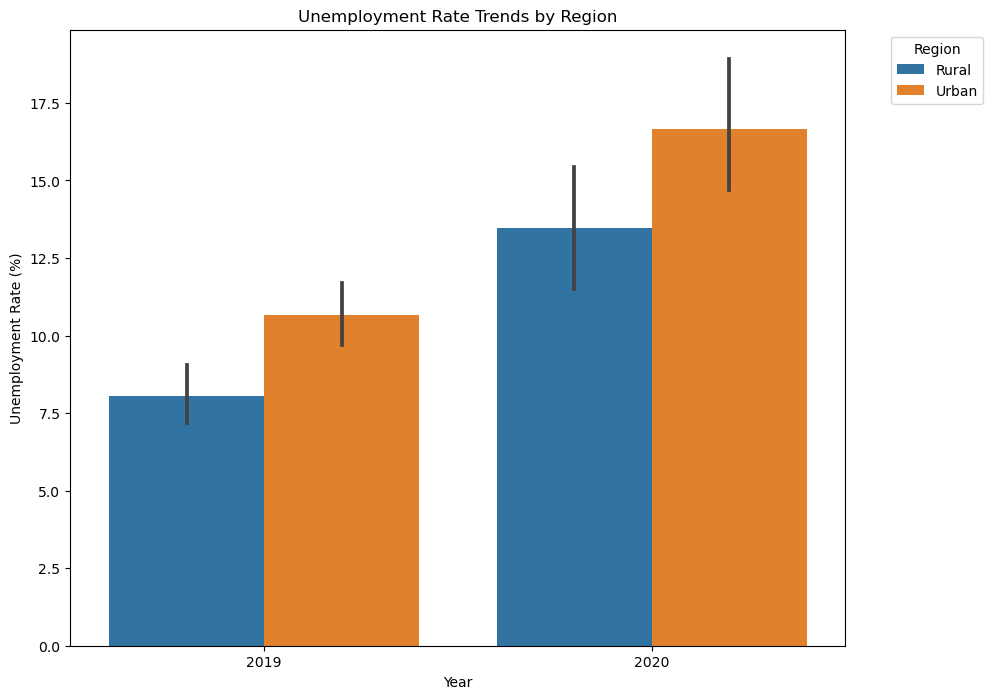

Significant Impact on Urban Areas During COVID-19


In [48]:
# Plot unemployment rate trends by region
plt.figure(figsize=(10, 8))
sns.barplot(x='Year', y='Unemployment_Rate', data=df, hue='Area', palette='tab10')
plt.title('Unemployment Rate Trends by Region')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print('Significant Impact on Urban Areas During COVID-19')

# How far the unemployment rate will go

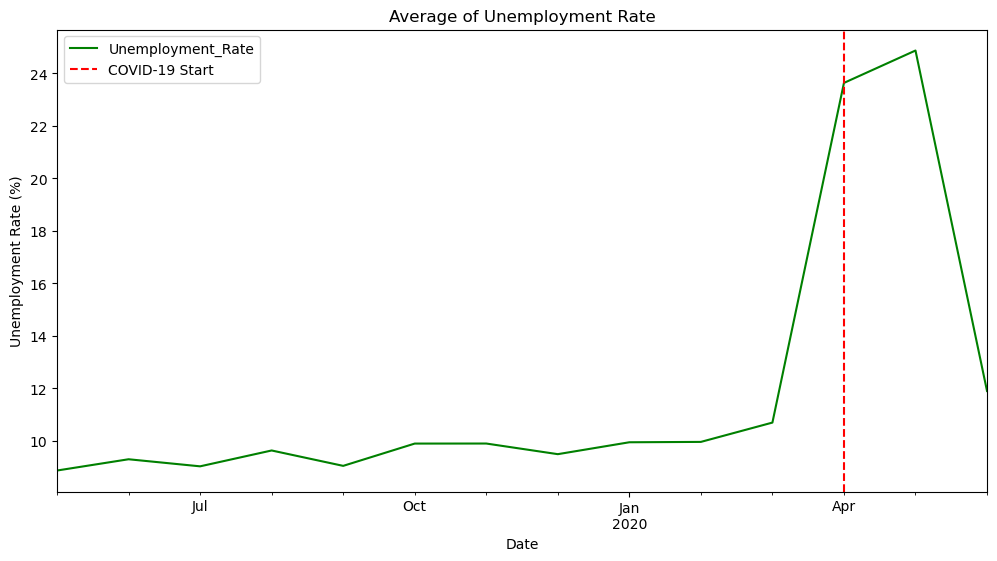

In [50]:
# Plot rolling average of unemployment rate to identify trends
plt.figure(figsize=(12, 6))
df.groupby('Date')['Unemployment_Rate'].mean().plot(color='green')
plt.axvline(pd.to_datetime('2020-04-01'), color='red', linestyle='--', label='COVID-19 Start')
plt.title('Average of Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

# Conclusion